In [23]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from rgf.sklearn import RGFClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

In [2]:
#
# 決定境界プロット関数
#
def plot_decision_regions(x, y, model, resolution=0.01):

    ## 今回は被説明変数が3クラスのため散布図のマーカータイプと3種類の色を用意
    ## クラスの種類数に応じて拡張していくのが良いでしょう
    markers = ('s', 'x', 'o')
    cmap = ListedColormap(('red', 'blue', 'green'))

    ## 2変数の入力データの最小値から最大値まで引数resolutionの幅でメッシュを描く
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                   np.arange(x2_min, x2_max, resolution))

    ## メッシュデータ全部を学習モデルで分類
    z = model.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
    z = z.reshape(x1_mesh.shape)

    ## メッシュデータと分離クラスを使って決定境界を描いている
    plt.contourf(x1_mesh, x2_mesh, z, alpha=0.4, cmap=cmap)
    plt.xlim(x1_mesh.min(), x1_mesh.max())
    plt.ylim(x2_mesh.min(), x2_mesh.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

In [3]:
df = pd.read_csv("c:/data/LinearBi.csv")
df.head(3)

,Y,X,type
0,0.263750,0.769778,1
1,0.049130,0.810317,1
2,0.327013,0.760773,1


In [4]:
y_data = df.type
x_data=df.drop(['type'], axis=1)

In [6]:
# 入力データの各変数が平均0,標準偏差1になるように正規化
# 各アルゴリズムのプロット結果を比較しやすいように予め全入力データを正規化
sc = StandardScaler()
sc.fit(x_data)
x_data = sc.transform(x_data)

In [7]:
# データを学習用/テスト用に分割している
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.2)

In [8]:
#
# 機械学習アルゴリズムの定義
#
lr = LogisticRegression(C=10)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', C=1.0)
dc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
rf = RandomForestClassifier(criterion='entropy',
                            n_estimators=10)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'extremely randomized trees')

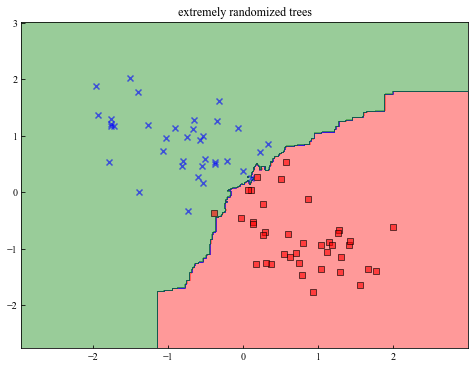

In [54]:
plt.figure(figsize=(8,6))

#plt.subplot(math.ceil(len(models)/2), 2, plot_num)
# モデルの学習
ert = ExtraTreesClassifier(n_estimators=100, random_state=0)
ert.fit(x_train, y_train)

plot_decision_regions(x_data, y_data, ert)
plt.title('extremely randomized trees')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'regularized greedy forest')

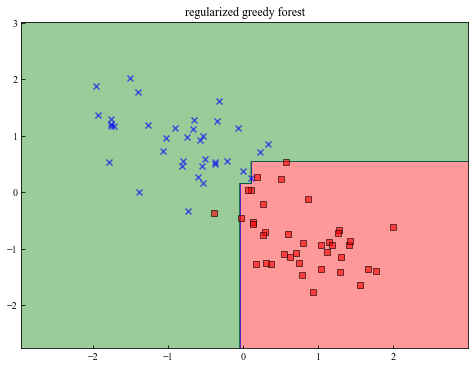

In [52]:
plt.figure(figsize=(8,6))

rgf = RGFClassifier(max_leaf=400,
                    algorithm="RGF_Sib",
                    test_interval=100,)


#plt.subplot(math.ceil(len(models)/2), 2, plot_num)
# モデルの学習
rgf.fit(x_train, y_train)

plot_decision_regions(x_data, y_data, rgf)
plt.title('regularized greedy forest')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'logistic regression')

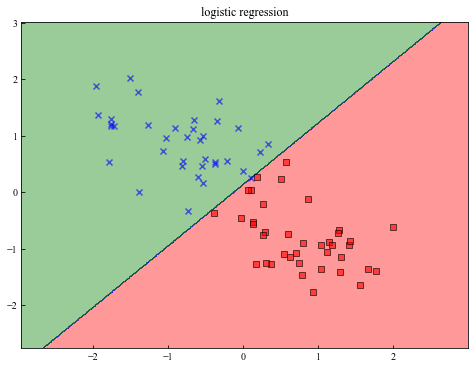

In [46]:
plt.figure(figsize=(8,6))

#plt.subplot(math.ceil(len(models)/2), 2, plot_num)
# モデルの学習
lr.fit(x_train, y_train)

plot_decision_regions(x_data, y_data, lr)
plt.title('logistic regression')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'k nearest neighbor')

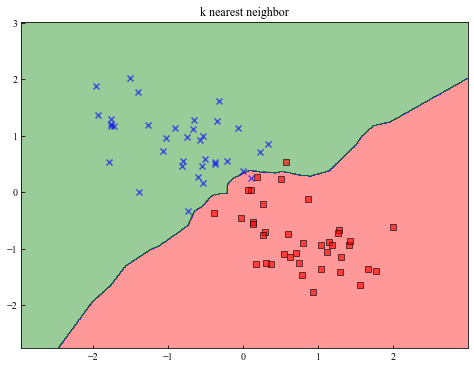

In [45]:
plt.figure(figsize=(8,6))

#plt.subplot(math.ceil(len(models)/2), 2, plot_num)
# モデルの学習
knn.fit(x_train, y_train)

plot_decision_regions(x_data, y_data, knn)
plt.title('k nearest neighbor')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'random forest')

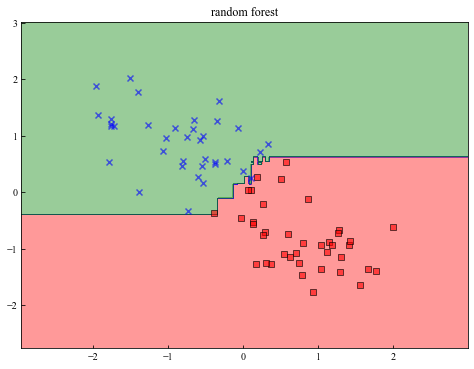

In [44]:
plt.figure(figsize=(8,6))
plot_num = 1

#plt.subplot(math.ceil(len(models)/2), 2, plot_num)
# モデルの学習
rf.fit(x_train, y_train)

plot_decision_regions(x_data, y_data, rf)
plt.title('random forest')

In [38]:
#lightgbm
# データセットを登録
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)

lightg = lgb.LGBMClassifier() # モデルのインスタンスの作成
lightg.fit(x_train, y_train) # モデルの学習

LGBMClassifier()

In [42]:
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# テストデータを予測する
y_pred_prob = lightg.predict_proba(x_test)

print(y_pred_prob)

[[9.91055469e-01 8.94453124e-03]
 [2.06158903e-03 9.97938411e-01]
 [4.76197103e-02 9.52380290e-01]
 [2.06158903e-03 9.97938411e-01]
 [2.06158903e-03 9.97938411e-01]
 [2.06158903e-03 9.97938411e-01]
 [9.93039259e-01 6.96074100e-03]
 [2.06158903e-03 9.97938411e-01]
 [3.56406195e-02 9.64359380e-01]
 [9.90605797e-01 9.39420290e-03]
 [2.06158903e-03 9.97938411e-01]
 [9.99672858e-01 3.27142067e-04]
 [9.99672858e-01 3.27142067e-04]
 [2.06158903e-03 9.97938411e-01]
 [9.91055469e-01 8.94453124e-03]]


In [36]:
accuracy_score(y_test, pred_y)

0.4666666666666667

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'lightgbm')

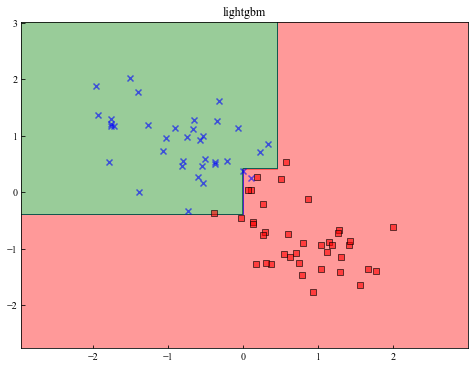

In [39]:
plt.figure(figsize=(8,6))
plot_num = 1

#plt.subplot(math.ceil(len(models)/2), 2, plot_num)


plot_decision_regions(x_data, y_data, lightg)
plt.title('lightgbm')

In [56]:
import xlearn as xl

In [57]:
ffm_model = xl.create_ffm()   

In [58]:
ffm_model.setTrain(x_train) 

Exception: ('Invalid train.Can be test file path or xLearn DMatrix', <class 'numpy.ndarray'>)

In [59]:
param = {'task':'binary', 'lr':0.2, 'lambda':0.002, 'metric':'acc'}